In [1]:

from io import StringIO
import requests
import json
import pandas as pd


df = pd.read_csv('data.csv')
#df.head()


In [2]:
%matplotlib inline
import matplotlib.pyplot as pyplot

df['Time'] = pd.to_datetime(df['Time'])
df.index = df['Time']
del df['Time']
#df.head()

In [3]:
df_Jan=df['2015-11-16':'2015-12-03']
df_Jan=df_Jan.resample('D', how='mean')

C:\Users\12bee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


In [4]:
df_Jan['date'] = df_Jan.index
df_Jan['date'] = pd.to_datetime(df_Jan['date'])
#df_Jan.head()

In [5]:
import numpy as np

#feature='temperature'
#df_A=df_Jan.sort_values(by=feature)
#X = df_A[feature].values
#y = (df_A['Apartment2'].values)*1000

X=(df_Jan['date'] - df_Jan['date'][0]).dt.days
y = (df_Jan['Apartment2'].values)*1000

#X = df_Jan.values[:,0:2]
#y = df_Jan.values[:,12]*1000


X=X.reshape(-1,1);
y=y.flatten();

C:\Users\12bee\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [6]:
# Not Splitting the dataset into the Training set and Test set as data set too small
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
#X_train=X_train.reshape(-1,1)
#y_train=y_train.flatten()
#X_test=X_test.reshape(-1,1)
#y_test=y_test.flatten()

C:\Users\12bee\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
lastFew=-3;
X_train=X[:lastFew];
X_test=X[lastFew:];
y_train=y[:lastFew];
y_test=y[lastFew:];

In [16]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

svr_lin = SVR(kernel='linear', C=10);
svr_poly = SVR(kernel='poly', degree=3);
svr_rbf = SVR(kernel='rbf', C=1000, gamma=.1);

svr_rbf.fit(X_train, y_train);
svr_lin.fit(X_train, y_train);
svr_poly.fit(X_train, y_train);

In [17]:
pred_SVRl = svr_lin.predict(X_test)
pred_SVRp = svr_poly.predict(X_test)
pred_SVRr = svr_rbf.predict(X_test)

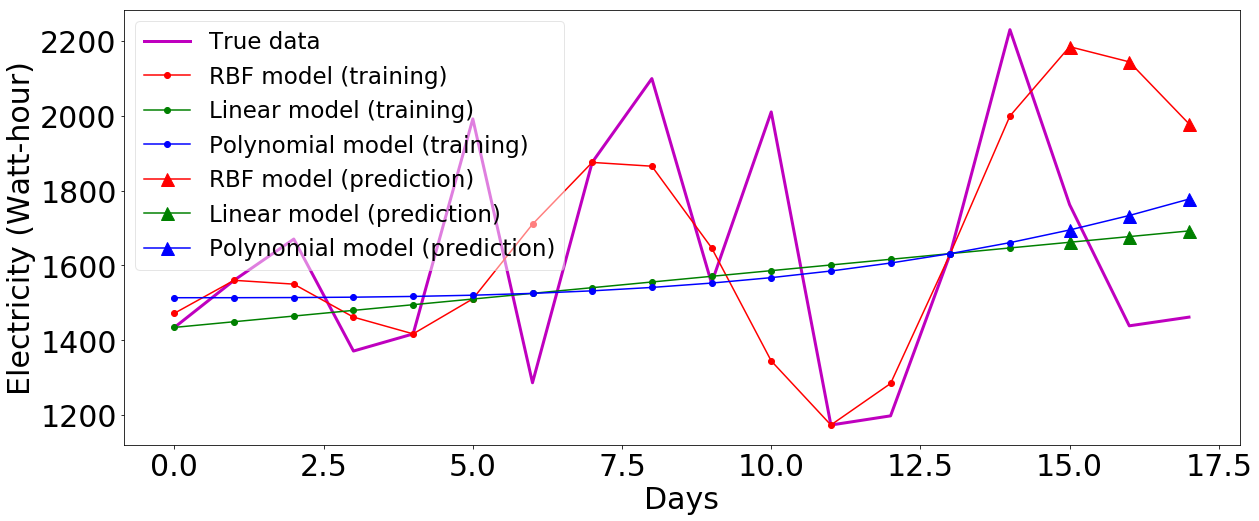

In [27]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 30})
plt.plot(X,y,'m-', label='True data', linewidth=3)

plt.plot(X_train,svr_rbf.predict(X_train),'ro-',label='RBF model (training)')
plt.plot(X_train,svr_lin.predict(X_train), 'go-',label='Linear model (training)')
plt.plot(X_train,svr_poly.predict(X_train),'bo-',label='Polynomial model (training)')


plt.plot(X_test,pred_SVRr, 'r^-',label='RBF model (prediction)', ms=13)
plt.plot(X_test,pred_SVRl,'g^-',label='Linear model (prediction)', ms=13)
plt.plot(X_test,pred_SVRp,'b^-', label='Polynomial model (prediction)', ms=13)


plt.plot([X_train[-1], X_test[0]],[svr_rbf.predict(X_train)[-1], pred_SVRr[0]], 'r-')
plt.plot([X_train[-1], X_test[0]],[svr_lin.predict(X_train)[-1], pred_SVRl[0]],'g-')
plt.plot([X_train[-1], X_test[0]],[svr_poly.predict(X_train)[-1], pred_SVRp[0]],'b-')

plt.ylabel('Electricity (Watt-hour)', fontsize=30)
plt.xlabel('Days', fontsize=30)
#plt.title('Support Vector Regression')
plt.legend(loc='upper left', fontsize=23,framealpha=0.5)
plt.savefig('3a.pdf', bbox_inches='tight')

In [19]:
import math
import numpy as np

#from sklearn.metrics import explained_variance_score
#print(explained_variance_score(y_test, predP))
#
#print(1-((np.sum((np.absolute(y_test- predP))/y_test))/len(y_test)))

from sklearn.metrics import r2_score
print ("svr_rbf,r2_score: " + str(r2_score(y_train, svr_rbf.predict(X_train))))
from sklearn.metrics import mean_squared_error
print ("svr_rbf,RMSE: " + str(1-(math.sqrt(mean_squared_error(y_test, pred_SVRr)))/np.mean(y_test)))
print ("svr_rbf,NMAE: " + str(1-np.mean(np.abs((y_test - pred_SVRr) / y_test))))

from sklearn.metrics import r2_score
print ("svr_poly,r2_score: " + str(r2_score(y_train, svr_poly.predict(X_train))))
from sklearn.metrics import mean_squared_error
print ("svr_poly,RMSE: " + str(1-(math.sqrt(mean_squared_error(y_test, pred_SVRp)))/np.mean(y_test)))
print ("svr_poly,NMAE: " + str(1-np.mean(np.abs((y_test - pred_SVRp) / y_test))))

from sklearn.metrics import r2_score
print ("svr_lin,r2_score: " + str(r2_score(y_train, svr_lin.predict(X_train))))
from sklearn.metrics import mean_squared_error
print ("svr_lin,RMSE: " + str(1-(math.sqrt(mean_squared_error(y_test, pred_SVRl)))/np.mean(y_test)))
print ("svr_lin,NMAE: " + str(1-np.mean(np.abs((y_test - pred_SVRl) / y_test))))



svr_rbf,r2_score: 0.370536349056
svr_rbf,RMSE: 0.639191896367
svr_rbf,NMAE: 0.638752774903
svr_poly,r2_score: -0.0229442607758
svr_poly,RMSE: 0.837592921344
svr_poly,NMAE: 0.846891934594
svr_lin,r2_score: -0.0349333365893
svr_lin,RMSE: 0.871234517945
svr_lin,NMAE: 0.873134699205
